Password for user mekhi:  ········


C:\Users\mekhi\AppData\Local\Temp\ipykernel_15272\663079976.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


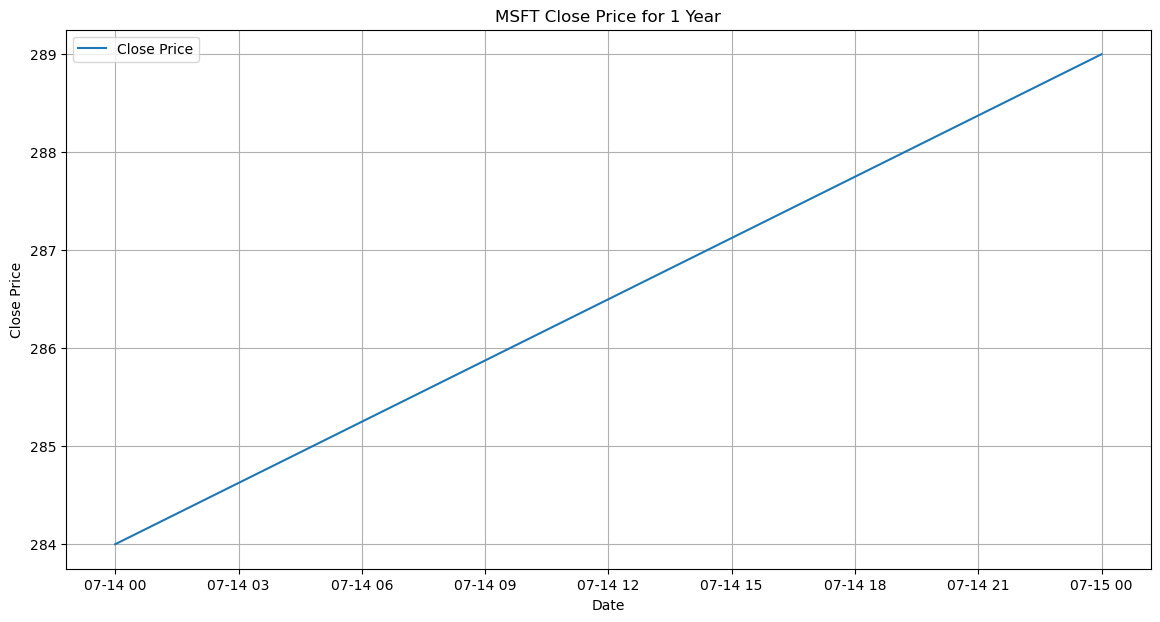

In [9]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import getpass

# Database connection details
dbname = "stock_marketsql"
user = "mekhi"
host = "localhost"

# Establish the connection
password = getpass.getpass('Password for user mekhi: ')
conn = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=1979,
    host=host
)

# Query to fetch 1 year of MSFT data
query = """
SELECT date, open_price, high_price, low_price, close_price, volume
FROM Stocks
JOIN Companies ON Stocks.company_id = Companies.id
WHERE Companies.ticker_symbol = 'MSFT'
AND date BETWEEN '2023-01-01' AND '2023-12-31'
ORDER BY date;
"""

# Load the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Plotting the data using matplotlib
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close_price'], label='Close Price')
plt.title('MSFT Close Price for 1 Year')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
